# Diabetes Predictor

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling Libraries
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_old = pd.read_csv('diabetes.csv')

In [3]:
df_old

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df=pd.read_csv('diabetes-dataset.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


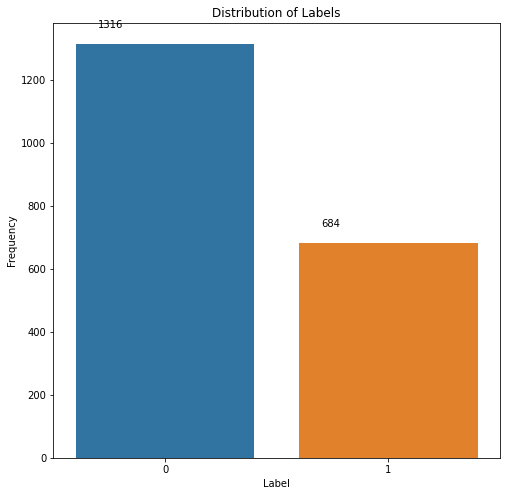

In [7]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x=df.Outcome)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')

for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [8]:
# Replacing zero values with NaN
df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI","Age"]] = df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI","Age"]].replace(0, np.NaN)

In [9]:
# Count of NaN
df.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
df["Glucose"].fillna(df["Glucose"].mean(), inplace = True)
df["BloodPressure"].fillna(df["BloodPressure"].mean(), inplace = True)
df["SkinThickness"].fillna(df["SkinThickness"].mean(), inplace = True)
df["Insulin"].fillna(df["Insulin"].mean(), inplace = True)
df["BMI"].fillna(df["BMI"].mean(), inplace = True)

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,35.000000,153.743295,33.6,0.127,47,1
1,0,84.0,82.000000,31.000000,125.000000,38.2,0.233,23,0
2,0,145.0,72.403665,29.341275,153.743295,44.2,0.630,31,1
3,0,135.0,68.000000,42.000000,250.000000,42.3,0.365,24,1
4,1,139.0,62.000000,41.000000,480.000000,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75.0,64.000000,24.000000,55.000000,29.7,0.370,33,0
1996,8,179.0,72.000000,42.000000,130.000000,32.7,0.719,36,1
1997,6,85.0,78.000000,29.341275,153.743295,31.2,0.382,42,0
1998,0,129.0,110.000000,46.000000,130.000000,67.1,0.319,26,1


In [13]:
print(df['Outcome'].value_counts())

0    1316
1     684
Name: Outcome, dtype: int64


In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.975340,72.403665,29.341275,153.743295,32.650101,0.470930,33.090500,0.342000
std,3.306063,30.533114,11.949531,9.123652,80.376307,7.190136,0.323553,11.786423,0.474498
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,120.000000,27.600000,0.244000,24.000000,0.000000
50%,3.000000,118.000000,72.000000,29.341275,153.743295,32.400000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,153.743295,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [15]:
list(df.columns)[:-1]

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [16]:
for col in df.columns:
    if col in list(df.columns)[:-1]:
        upper_limit = df[col].mean() + 3*df[col].std()
        lower_limit = df[col].mean() - 3*df[col].std()
        df[col] = np.where(df[col]>upper_limit,upper_limit,np.where(df[col]<lower_limit,lower_limit,df[col]))
        

In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.695730,121.975340,72.390692,29.230693,150.860100,32.580665,0.465364,33.062373,0.342000
std,3.279674,30.533114,11.750854,8.512738,67.678914,6.898693,0.300407,11.690556,0.474498
min,0.000000,44.000000,36.555073,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,120.000000,27.600000,0.244000,24.000000,0.000000
50%,3.000000,118.000000,72.000000,29.341275,153.743295,32.400000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,153.743295,36.800000,0.624000,40.000000,1.000000
max,13.621689,199.000000,108.252257,56.712230,394.872217,54.220509,1.441588,68.449769,1.000000


In [18]:
# Selecting features - [Glucose, Insulin, BMI, Age]
x = df.iloc[:, [0,1,2,3, 4, 5,6,7]].values
y = df.iloc[:,8].values

In [19]:
x.shape,y.shape

((2000, 8), (2000,))

In [20]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(random_state=10)
X_res,y_res=os.fit_resample(x,y)
print(type(y_res))

<class 'numpy.ndarray'>


In [21]:
X_res.shape,y_res.shape

((2632, 8), (2632,))

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_res, y_res)
print(model.feature_importances_)

[0.1094674  0.23927024 0.09113808 0.0877416  0.08758887 0.14143401
 0.10490635 0.13845345]


In [23]:
feature_importance = pd.DataFrame(model.feature_importances_)
lst=list(feature_importance.sort_values(0,ascending=False).head(6).index)
lst.sort()
lst

[0, 1, 2, 5, 6, 7]

In [24]:
x = X_res[:,lst]

In [25]:
for i in lst:
    print(df.columns[i])

Pregnancies
Glucose
BloodPressure
BMI
DiabetesPedigreeFunction
Age


In [26]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
x = sc.fit_transform(x)

In [26]:
x

array([[2.00000000e+00, 1.38000000e+02, 6.20000000e+01, 3.36000000e+01,
        1.27000000e-01, 4.70000000e+01],
       [0.00000000e+00, 8.40000000e+01, 8.20000000e+01, 3.82000000e+01,
        2.33000000e-01, 2.30000000e+01],
       [0.00000000e+00, 1.45000000e+02, 7.24036649e+01, 4.42000000e+01,
        6.30000000e-01, 3.10000000e+01],
       ...,
       [0.00000000e+00, 1.80000000e+02, 9.00000000e+01, 3.65000000e+01,
        3.14000000e-01, 3.50000000e+01],
       [1.00000000e+00, 8.80000000e+01, 3.65550730e+01, 5.42205091e+01,
        4.96000000e-01, 2.60000000e+01],
       [1.00000000e+00, 1.73000000e+02, 7.40000000e+01, 3.68000000e+01,
        8.80000000e-02, 3.80000000e+01]])

In [27]:
y

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [28]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y_res, test_size = 0.20, random_state = 42)

In [29]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (2105, 6)
X_test shape: (527, 6)
Y_train shape: (2105,)
Y_test shape: (527,)


In [30]:
def evaluate_model(models):
   
    result_train = []
    result_test = []
    for model in models :
        trained_model = model.fit(X_train, Y_train)
        Y_pred = trained_model.predict(X_test)
        accuracy_test = accuracy_score(Y_test, Y_pred)
        accuracy_train = accuracy_score(Y_train, trained_model.predict(X_train))
        result_train.append(accuracy_train*100)
        result_test.append(accuracy_test*100)
        

    result_df = pd.DataFrame({
        "Accuracy Training Set":result_train,
        "Accuracy Testing Set":result_test,
        "Models":[
            "Logistic Regression",
            "Decision Tree Classifier",
            "AdaBoost Classifier",
            "Support Vector Machine",
            "Random Forest Classifier",
            "Gradient Boosting Classifier",
            "XGBoost",
            "Naive Bayes",
            "K-Nearest Neighbors Classifier",
            "LightGBM"
        ]
    })

    # Generate chart
    bar = sns.barplot(x = "Accuracy Testing Set", y = "Models", data = result_df, orient = "h",order=result_df.sort_values('Accuracy Testing Set',ascending = False).Models.head())
    bar.set_xlabel("Mean Accuracy")
    bar.set_title("Accuracy Scores")
    return result_df.sort_values('Accuracy Testing Set',ascending = False).head()

[22:31:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy Training Set,Accuracy Testing Set,Models
4,100.000000,99.051233,Random Forest Classifier
6,100.000000,99.051233,XGBoost
9,100.000000,98.861480,LightGBM
1,100.000000,98.292220,Decision Tree Classifier
8,98.954869,92.409867,K-Nearest Neighbors Classifier


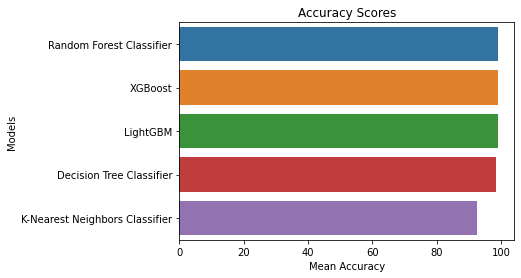

In [31]:
# Modeling step Test differents algorithms 
random_state = 30
models = [
    LogisticRegression(random_state = random_state),
    DecisionTreeClassifier(random_state = random_state),
    AdaBoostClassifier(n_estimators=50,learning_rate=1),
    SVC(random_state = 0),
    RandomForestClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    XGBClassifier(),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=3),
    lgb.LGBMClassifier()
]
evaluate_model(models)

Accuracy: 99.05%


Text(16.5, 0.5, 'Predicted Label')

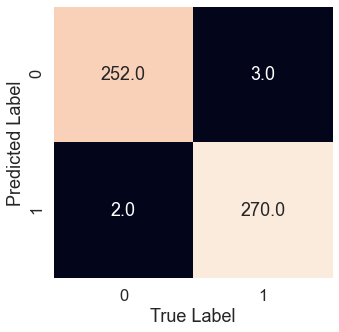

In [32]:
# Define models and parameters for RandomForestClassifier
model =  RandomForestClassifier(random_state = 30)

rfc = model.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: " + str(round((accuracy * 100),2))+"%")


sns.set(font_scale=1.5)
fig,ax=plt.subplots(figsize=(5,5))
ax=sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,cbar=False,fmt=".1f")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

In [ ]:
input_data = (10,101,76,48,180,32.9,0.171,63)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
#std_data = sc.transform(input_data_reshaped)

prediction = rfc.predict(input_data_reshaped)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

In [33]:
rfc

RandomForestClassifier(random_state=30)

In [34]:
import pickle
pickle.dump(rfc,open(r'C:\Users\antar\PycharmProjects\HealthCareSystem\Diabetes.pkl','wb'))

In [ ]:
df.to_csv(r'C:\Users\antar\PycharmProjects\HealthCareSystem\diabetes.csv')